# K Means 

Text(0.5,1,'Petal')

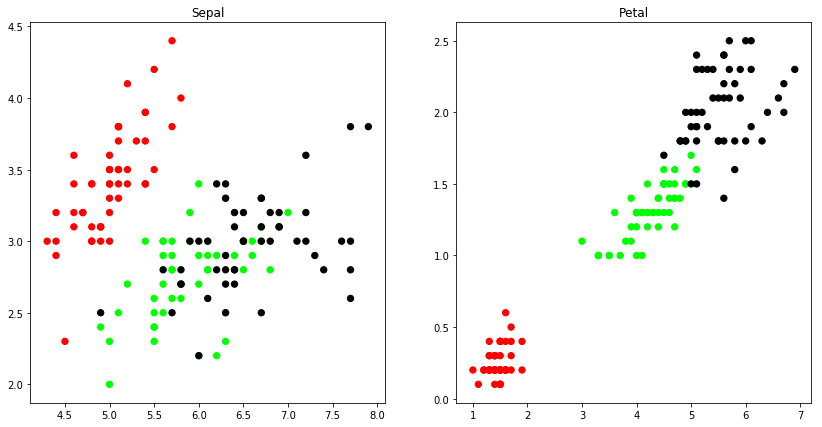

In [164]:
# Author : Dr.Thyagaraju G S , Context Innovations Lab , DEpt of CSE , SDMIT - Ujire 
# Date : July 11 2018 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()

#print("\n IRIS DATA :",iris.data);
#print("\n IRIS FEATURES :\n",iris.feature_names)
#print("\n IRIS TARGET :\n",iris.target)
#print("\n IRIS TARGET NAMES:\n",iris.target_names)

# Store the inputs as a Pandas Dataframe and set the column names
X = pd.DataFrame(iris.data)

#print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#print(X.columns)
#print("X:",x)
#print("Y:",y)    
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')


# Build the K Means Model

In [165]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(X)
# This is what KMeans thought
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# Visualise the classifier results

Text(0.5,1,'K Mean Classification')

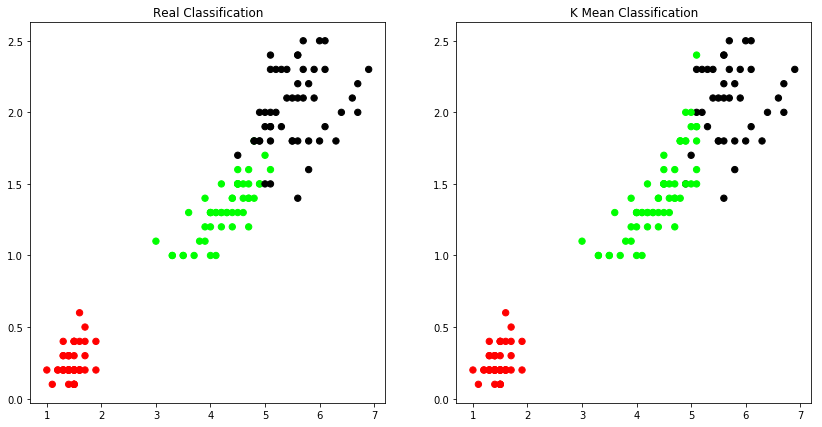

In [166]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

# The Fix

In [168]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
print (predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


# Re-plot

Text(0.5,1,'K Mean Classification')

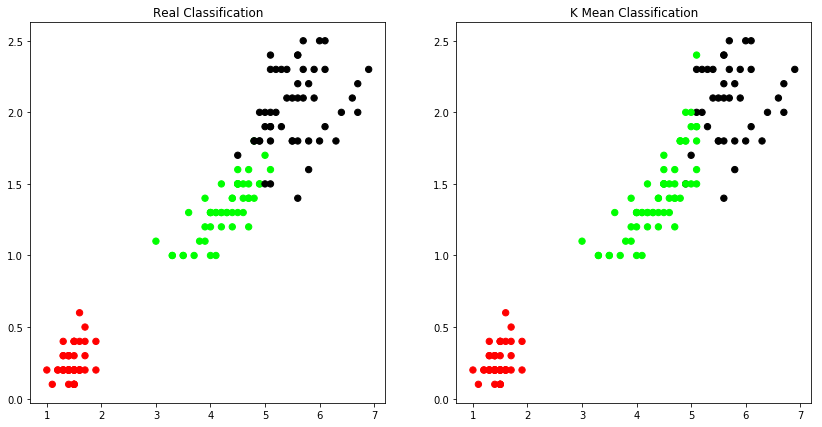

In [169]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Orginal
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

# Performance Measures

# Accuracy

In [170]:
sm.accuracy_score(y, model.labels_)

0.89333333333333331

# Confusion Matrix

In [171]:
# Confusion Matrix
sm.confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

# GMM

In [172]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
xs.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
132,0.674501,-0.587764,1.047087,1.316483
110,0.795669,0.337848,0.762759,1.053537
93,-1.021849,-1.744778,-0.260824,-0.261193
24,-1.264185,0.800654,-1.056944,-1.312977
111,0.674501,-0.819166,0.876490,0.922064


In [173]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [101]:
y_cluster_gmm = gmm.predict(xs)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Text(0.5,1,'GMM Classification')

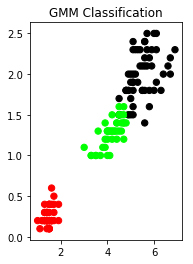

In [175]:
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')

In [176]:
sm.accuracy_score(y, y_cluster_gmm)

0.96666666666666667

In [177]:
# Confusion Matrix
sm.confusion_matrix(y, y_cluster_gmm)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 50]], dtype=int64)

In [ ]:
 # so the GMM clustering matched the true labels more closely than the Kmeans,
# as expected from the plots.